In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
def cal_mean(X, Y, w1):
    Y_act = X @ w1
    mse = ((Y_act - Y) ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [33]:
def gradient(X_train, Y_train, X_test, Y_test, learning_rate, iterations):
    w = np.ones((X_train.shape[1], 2))
    train_errors = []
    test_errors = []

    for i in range(iterations):
        predict = np.dot(X_train , w)
        error = predict - Y_train
        grad = np.dot(X_train.T , error)
        w -= learning_rate * grad
        test_rmse = cal_mean(X_test, Y_test, w)
        train_rmse = cal_mean(X_train, Y_train, w)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return train_errors, test_errors, w

In [34]:
df = pd.read_csv("Regression.csv").dropna()
input_features = df.iloc[:, 2:-2]
input_features = (input_features - input_features.mean()) / input_features.std()
input_features.insert(0, "bias", 1)
target_variables = df.iloc[:, -2:]

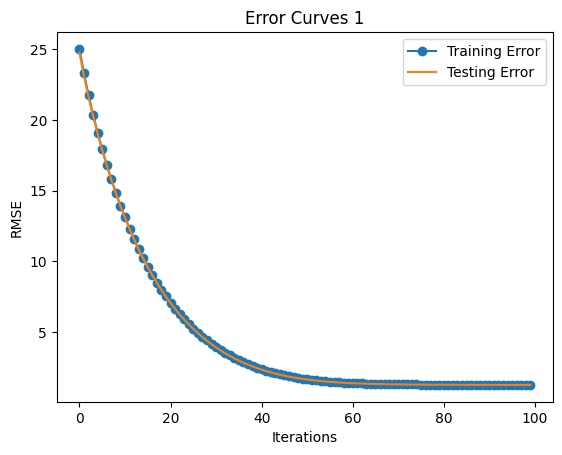

Training rmse: 1.2688289780612705
Test rmse: 1.2666373001390836


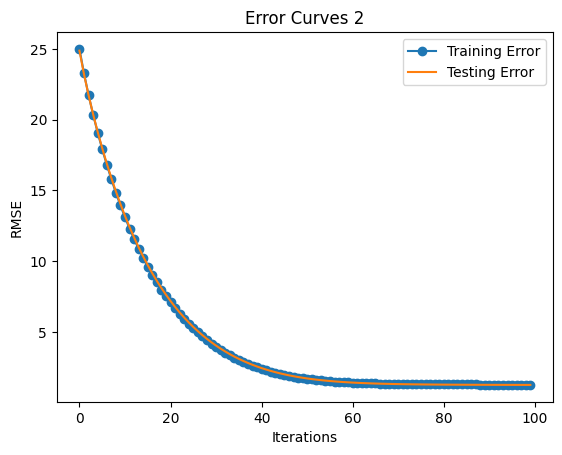

Training rmse: 1.2745896344639365
Test rmse: 1.251739977791439


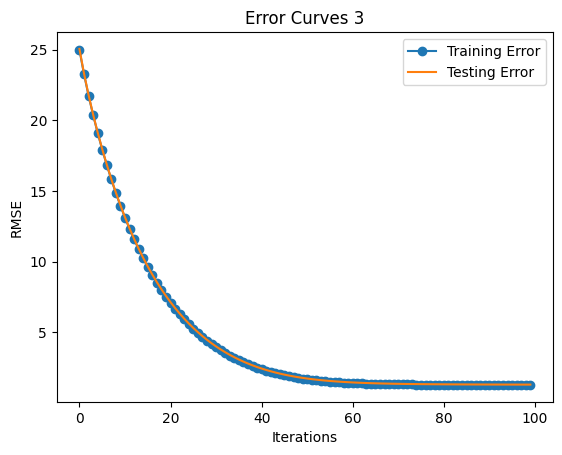

Training rmse: 1.2667045711553768
Test rmse: 1.2889240166431255


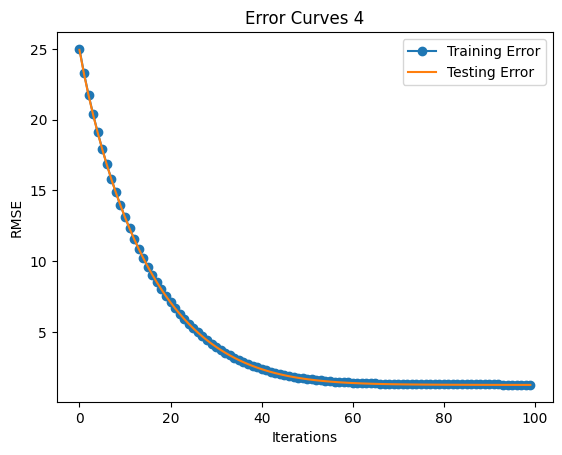

Training rmse: 1.2747282539732239
Test rmse: 1.2479032561962269


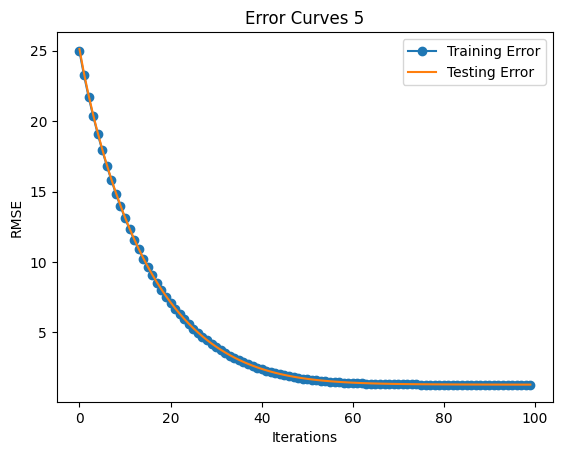

Training rmse: 1.2668413597760202
Test rmse: 1.2877263093931852


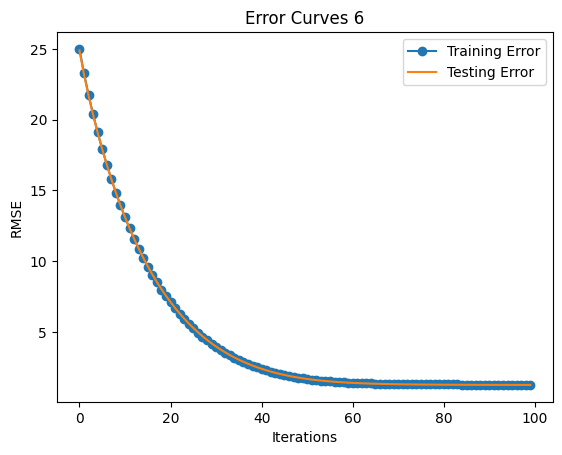

Training rmse: 1.2724106723560447
Test rmse: 1.2524698954866509


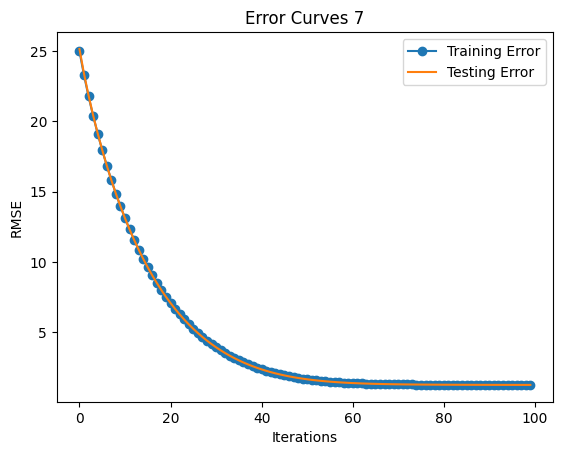

Training rmse: 1.2687513300353008
Test rmse: 1.2688872302885208


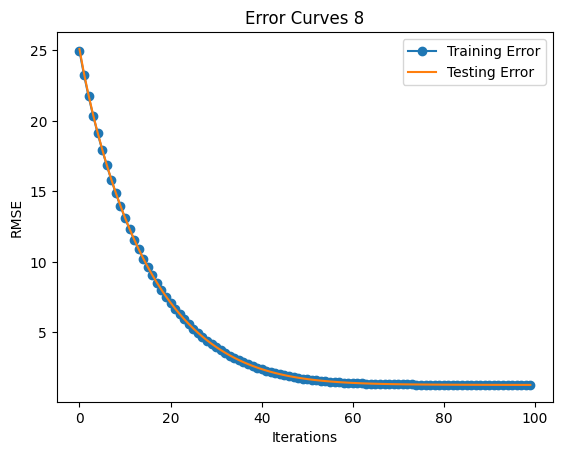

Training rmse: 1.2711253553288084
Test rmse: 1.2707286106343907


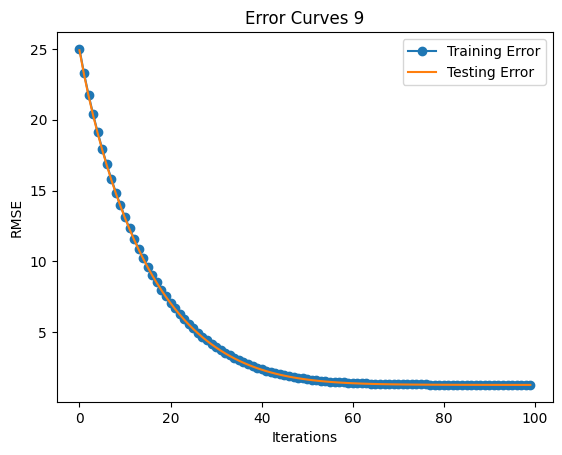

Training rmse: 1.2699658852561553
Test rmse: 1.2623088512508807


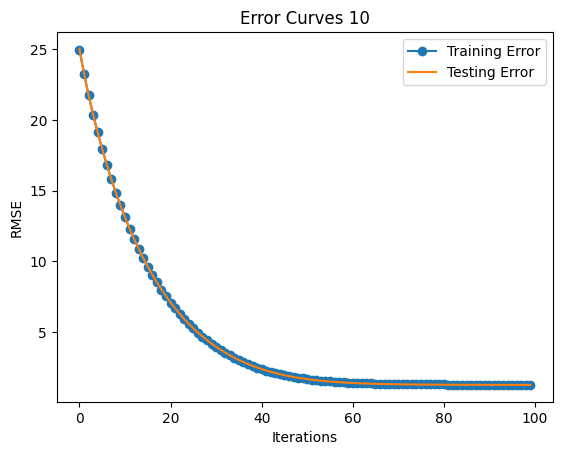

Training rmse: 1.272321123116153
Test rmse: 1.256139397472366


In [35]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(input_features.values, 
                                                        target_variables.values, test_size=0.2, random_state=i)
    learning_rate = 1e-5
    iterations = 100
    train_errors, test_errors, w = gradient(X_train, Y_train, X_test, Y_test, learning_rate, iterations)
    
    plt.plot(np.arange(iterations), train_errors, label="Training Error",marker='o')
    plt.plot(np.arange(iterations), test_errors, label="Testing Error")
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.title("Error Curves "+str(i+1))
    plt.legend()
    plt.show()

    
    print("Training rmse: " + str(train_errors[-1]))
    print("Test rmse: " + str(test_errors[-1]))